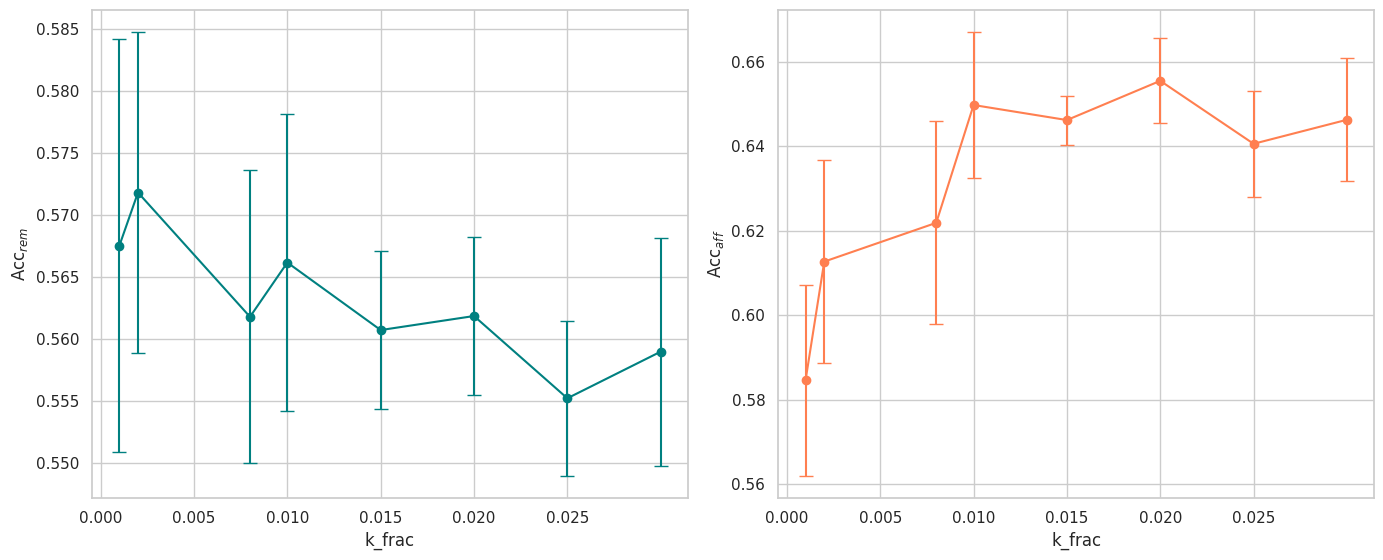

In [48]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import numpy as np
from collections import defaultdict

# Load and parse the data from file
with open("./report.txt", "r") as f:
    text = f.read().split("\n")

# Convert text lines to dictionaries
dict_arr = [ast.literal_eval(strv) for strv in text if strv]

# Aggregate data by `k_frac` to calculate mean and standard deviation
aggregated_data = defaultdict(lambda: {"Forg_Accuracy": [], "Util_Accuracy": []})

# Populate the aggregated data
for entry in dict_arr:
    k_frac = entry["k_frac"]
    aggregated_data[k_frac]["Forg_Accuracy"].append(entry["Forg_Accuracy"])
    aggregated_data[k_frac]["Util_Accuracy"].append(entry["Util_Accuracy"])

# Calculate means and standard deviations
k_fracs = sorted(aggregated_data.keys())
forg_means = [np.mean(aggregated_data[k]["Forg_Accuracy"]) for k in k_fracs]
forg_stds = [np.std(aggregated_data[k]["Forg_Accuracy"]) for k in k_fracs]
util_means = [np.mean(aggregated_data[k]["Util_Accuracy"]) for k in k_fracs]
util_stds = [np.std(aggregated_data[k]["Util_Accuracy"]) for k in k_fracs]

# %%
# Plotting
sns.set(style="whitegrid")  # Set Seaborn style for a clean background
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Util Accuracy plot
ax[0].errorbar(k_fracs, util_means, yerr=util_stds, fmt='-o', capsize=5, color='teal', label="Util Accuracy")
# ax[0].set_title("Util Accuracy")
ax[0].set_xlabel("k_frac")
ax[0].set_ylabel("Acc$_{rem}$")
# ax[0].set_ylim(0, 1)  # Set y-axis between 0 and 1
ax[0].set_xticks(np.arange(0, 0.03, 0.005))

# Forg Accuracy plot
ax[1].errorbar(k_fracs, forg_means, yerr=forg_stds, fmt='-o', capsize=5, color='coral', label="Forg Accuracy")
# ax[1].set_title("Forg Accuracy")
ax[1].set_xlabel("k_frac")
ax[1].set_ylabel("Acc$_{aff}$")
# ax[1].set_ylim(0, 1)  # Set y-axis between 0 and 1
ax[1].set_xticks(np.arange(0, 0.03, 0.005))

# plt.suptitle("Variation of Accuracy Metrics", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
